In [1]:
import sys,os,time
import pandas as pd
import numpy as np
from numba import jit
import numba as nb
from tqdm.notebook import tqdm

from scipy.integrate import quad

#--matplotlib
import matplotlib.pyplot as plt
params = {}
params['text.latex.preamble'] = r'\usepackage{amsmath}'
params['text.usetex']         = True
params['font.family']         = 'sans-serif'
params['font.sans-serif']     = ['Helvetica']
plt.rcParams.update(params)
# import matplotlib
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# matplotlib.rc('text',usetex=True)
# import pylab  as plt
# from matplotlib.lines import Line2D
# from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ylz72rw6 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def checkdir(path):
    if not os.path.exists(path):
        os.mkdir(path)
    else:
        print('%s already exists'%path)

In [3]:
ls /w/jam-sciwork18/apps/lhapdf_tables | grep JAM22

JAM22ffpion/
JAM22pdf/
JAM22ppdf/


In [4]:
import lhapdf
path="/w/jam-sciwork18/apps/lhapdf_tables"
os.environ["LHAPDF_DATA_PATH"] = path
# NNPDF=lhapdf.mkPDFs("NNPDF31_nlo_as_0118")
# NNPDF=lhapdf.mkPDFs("NNPDF40_nlo_as_01180")
# CT=lhapdf.mkPDFs("CT18NLO")
# MMHT=lhapdf.mkPDFs("MMHT2014nlo68cl")
JAM  = lhapdf.mkPDFs("JAM22pdf")
JAMp = lhapdf.mkPDFs("JAM22ppdf") 

# Polarized APV

In [5]:
GF  = 1.1663787e-5
sin2_thw = 0.23122
gAe = -0.5
gVe = -0.5 + 2.0*sin2_thw

alfa = 1.0/137.0
M = 0.938

# JLab
E = 22.0
root_s = np.sqrt(M**2.0 + 2.0*M*E)

# EIC
# root_s = 140.0

s = root_s**2.0

In [6]:
x  = np.logspace(-1.0,np.log10(0.7))
Q2 = 10.0

flavs  = ['d','u','s','c']
iflavs = [1,2,3,4]
xfps   = {}
for i in iflavs:
    temp_q  = []
    temp_qb = [] 
    for irep in range(100):
        temp_q.append([ JAMp[irep].xfxQ2( i,_,Q2) for _ in x])
        temp_qb.append([JAMp[irep].xfxQ2(-i,_,Q2) for _ in x])
    
    xfps[flavs[i-1]]     = np.array(temp_q)
    xfps[flavs[i-1]+'b'] = np.array(temp_qb)

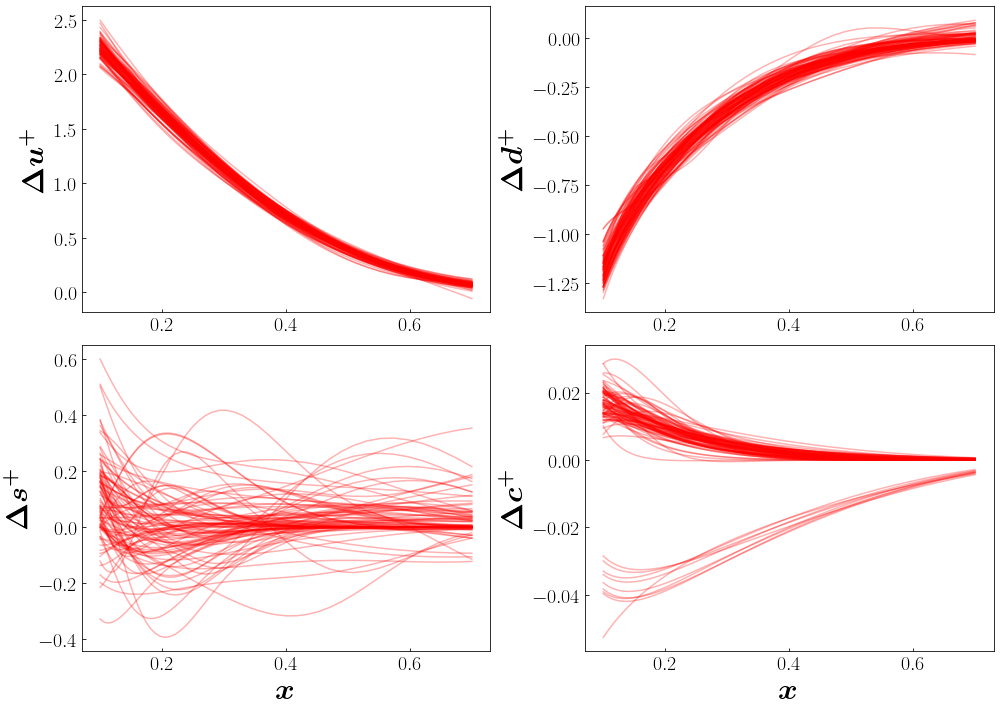

In [7]:
nrows,ncols = 2,2
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

flav = 'u'
data = xfps[flav] + xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[0][0].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[0][0].set_ylabel(r'\boldmath $\Delta %s^{+}$'%flav,size=30)
# mean = np.mean(data,axis=0)
# std  = np.std(data,axis=0)
# ax.fill_between(x,mean-std,mean+std,color='k')

flav = 'd'
data = xfps[flav] + xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[0][1].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[0][1].set_ylabel(r'\boldmath $\Delta %s^{+}$'%flav,size=30)
    
flav = 's'
data = xfps[flav] + xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[1][0].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[1][0].set_ylabel(r'\boldmath $\Delta %s^{+}$'%flav,size=30)
    
flav = 'c'
data = xfps[flav] + xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[1][1].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[1][1].set_ylabel(r'\boldmath $\Delta %s^{+}$'%flav,size=30)
    
for i in range(2):
    ax[1][i].set_xlabel(r'\boldmath $x$',size=30)
    for j in range(2):
        ax[i][j].tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.tight_layout()
plt.show()

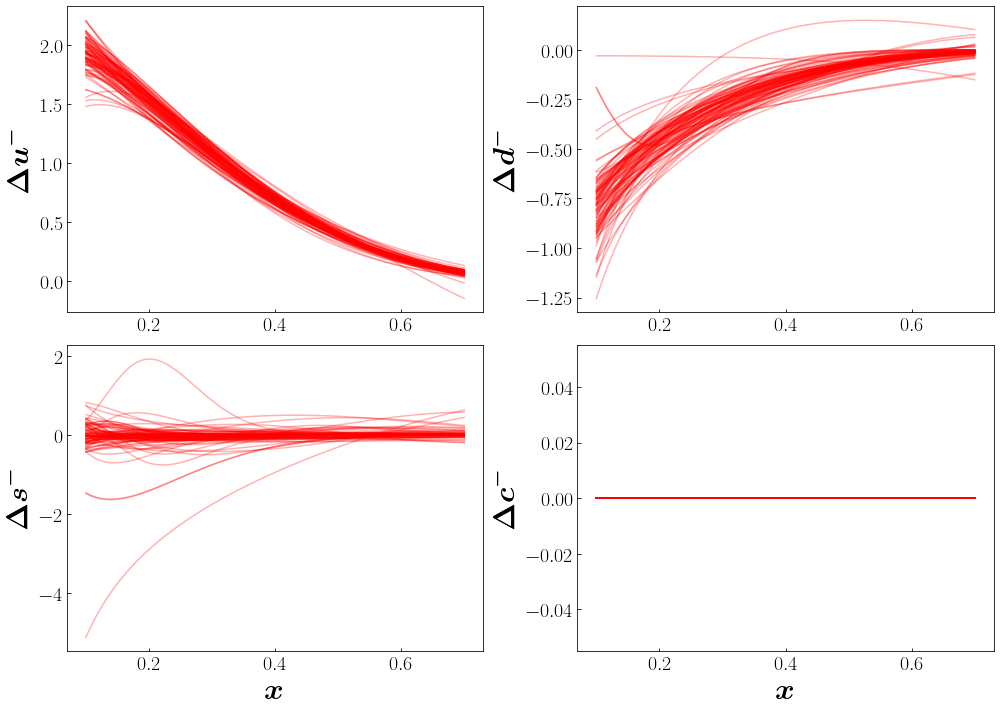

In [8]:
nrows,ncols = 2,2
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

flav = 'u'
data = xfps[flav] - xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[0][0].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[0][0].set_ylabel(r'\boldmath $\Delta %s^{-}$'%flav,size=30)
# mean = np.mean(data,axis=0)
# std  = np.std(data,axis=0)
# ax.fill_between(x,mean-std,mean+std,color='k')

flav = 'd'
data = xfps[flav] - xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[0][1].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[0][1].set_ylabel(r'\boldmath $\Delta %s^{-}$'%flav,size=30)
    
flav = 's'
data = xfps[flav] - xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[1][0].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[1][0].set_ylabel(r'\boldmath $\Delta %s^{-}$'%flav,size=30)
    
flav = 'c'
data = xfps[flav] - xfps[flav+'b']
for irep in range(np.shape(xfps[flav])[0]):
    ax[1][1].plot(x,data[irep]/x,'r',alpha=0.3)
    ax[1][1].set_ylabel(r'\boldmath $\Delta %s^{-}$'%flav,size=30)
    
for i in range(2):
    ax[1][i].set_xlabel(r'\boldmath $x$',size=30)
    for j in range(2):
        ax[i][j].tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.tight_layout()
plt.show()

In [9]:
flavs  = ['d','u','s','c','b']
iflavs = [1,2,3,4,5]
eU  = 2.0/3.0
eD  = -1.0/3.0
eq = {'d':eD, 'u':eU, 's':eD, 'c':eU, 'b':eD}
gA = {_: np.sign(eq[_])/2.0 for _ in flavs}
gV = {_: gA[_]-2.0*eq[_]*sin2_thw for _ in flavs}

def get_pdfs(x,Q2,nreps=100):
    fs   = {}
    for i in iflavs:
        temp_q  = []
        temp_qb = []
        for irep in range(nreps):
            temp_q.append([ JAM[irep].xfxQ2( i,_,Q2)/_ for _ in x])
            temp_qb.append([JAM[irep].xfxQ2(-i,_,Q2)/_ for _ in x])

        fs[flavs[i-1]]     = np.array(temp_q)
        fs[flavs[i-1]+'b'] = np.array(temp_qb)
    return fs

def get_ppdfs(x,Q2,nreps=100):
    fps   = {}
    for i in iflavs:
        temp_q  = []
        temp_qb = []
        for irep in range(nreps):
            temp_q.append([ JAMp[irep].xfxQ2( i,_,Q2)/_ for _ in x])
            temp_qb.append([JAMp[irep].xfxQ2(-i,_,Q2)/_ for _ in x])

        fps[flavs[i-1]]     = np.array(temp_q)
        fps[flavs[i-1]+'b'] = np.array(temp_qb)
    return fps

In [10]:
def g1_gZ(x,Q2,iveto=[1,1,1,1,1]):
    ppdfs  = get_ppdfs(x,Q2)
    ppdf_p = {_: ppdfs[_] + ppdfs[_+'b'] for _ in flavs} 
    
    g1 = np.zeros(np.shape(ppdf_p['d']))
    for i,_ in enumerate(flavs):
        if iveto[i] != 0:
            g1 += eq[_]*gV[_]*ppdf_p[_]
    return g1

def g5_gZ(x,Q2,iveto=[1,1,1,1,1]):
    ppdfs  = get_ppdfs(x,Q2)
    ppdf_m = {_: ppdfs[_] - ppdfs[_+'b'] for _ in flavs}
    
    g5 = np.zeros(np.shape(ppdf_m['d']))
    for i,_ in enumerate(flavs):
        if iveto[i] != 0:
            g5 += -eq[_]*gA[_]*ppdf_m[_]
    return g5

def F1_g(x,Q2,iveto=[1,1,1,1,1]):
    pdfs  = get_pdfs(x,Q2)
    pdf_p = {_: pdfs[_] + pdfs[_+'b'] for _ in flavs}
    
    F1 = np.zeros(np.shape(pdf_p['d']))
    for i,_ in enumerate(flavs):
        if iveto[i] != 0:
            F1 += 0.5*eq[_]**2.0*pdf_p[_]
    return F1

In [11]:
def b1_coeff(y):
    return y*(2.0-y)/(1.0+(1.0-y)**2.0)

def b5_coeff(x,y):
    return (2.0*x**2.0*y**2.0-y+1.0)/x**2.0/(1.0+(1.0-y)**2.0)

def b1(x,Q2,iveto=[1,1,1,1,1]):
    return 2.0*gAe*g1_gZ(x,Q2,iveto)/F1_g(x,Q2,iveto)
    
def b5(x,Q2,iveto=[1,1,1,1,1]):
    return gVe*g5_gZ(x,Q2,iveto)/F1_g(x,Q2,iveto)
    
def APV_pol(x,Q2,rs,iveto=[1,1,1,1,1]):
    alfa = 1.0/137.0
    factor = GF*Q2/4.0/np.sqrt(2.0)/np.pi/alfa
    
    s = rs**2.0
    M = 0.938
    y = Q2/(s-M**2.0)/x
    
    return factor*(b1_coeff(y)*b1(x,Q2,iveto)+b5_coeff(x,y)*b5(x,Q2,iveto))

In [17]:
x  = np.logspace(-3.0,np.log10(0.7),100)
Q2 = 10.0
y  = Q2/(s-M**2.0)/x

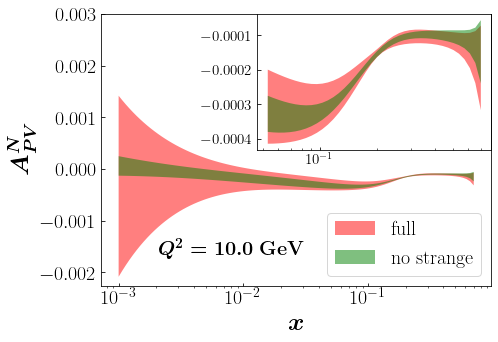

In [18]:
nrows,ncols=1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

x0,y0 = 0.4,0.5
axins = ax.inset_axes([x0,y0,1.0-x0,1.0-y0],transform=ax.transAxes)
idx1  = np.where(x>0.05)[0][0]

APV_N = APV_pol(x,Q2,root_s)
mean  = np.mean(APV_N,axis=0)
std   = np.std(APV_N,axis=0)
ax.fill_between(x,mean-std,mean+std,color='r',alpha=0.5,edgecolor='None',label=r'$\rm full$')
axins.fill_between(x[idx1:],(mean-std)[idx1:],(mean+std)[idx1:],color='r',alpha=0.5,edgecolor='None')

APV_N_ns = APV_pol(x,Q2,root_s,iveto=[1,1,0,1,1])
mean  = np.mean(APV_N_ns,axis=0)
std   = np.std(APV_N_ns,axis=0)
ax.fill_between(x,mean-std,mean+std,color='g',alpha=0.5,edgecolor='None',label=r'$\rm no~strange$')
axins.fill_between(x[idx1:],(mean-std)[idx1:],(mean+std)[idx1:],color='g',alpha=0.5,edgecolor='None')

# for i in range(np.shape(APV_N)[0]):
#     ax.plot(x,APV_N[i],color='r')
#     ax.plot(x,APV_N_ns[i],color='g')

# APV_N_nsc = APV_pol(x,Q2,root_s,iveto=[1,1,0,0])
# mean  = np.mean(APV_N_ns,axis=0)
# std   = np.std(APV_N_ns,axis=0)
# ax.fill_between(x,mean-std,mean+std,color='b',alpha=0.5,label=r'$\rm no~strange,~charm$')

axins.semilogx()
axins.tick_params(axis='both',which='major',direction='in',labelsize=15)
axins.tick_params(axis='both',which='minor',direction='in',labelsize=15)

ax.legend(fontsize=20,loc='lower right')
ax.set_xlabel(r'\boldmath $x$',size=25)
ax.set_ylabel(r'\boldmath $A_{PV}^{N}$',size=25)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)
ax.semilogx()
ax.text(x=0.15,y=0.1,s=r'\boldmath $Q^2=%.1f~{\rm GeV}$'%Q2,size=20,transform=ax.transAxes,ha='left',va='bottom')
ax.set_ylim(top=0.003)

plt.show()
# fig.savefig('gallery/polarized_APV.pdf',bbox_inches='tight')

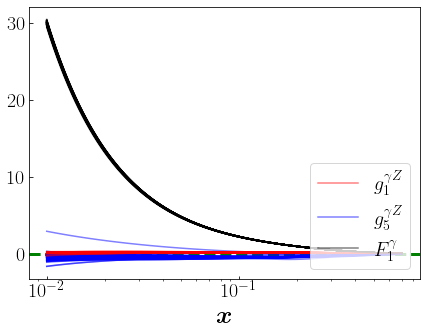

In [186]:
nrows,ncols=1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

ax.axhline(y=0.0,color='g',ls='--',lw=3)

g1 = g1_gZ(x,Q2)
g5 = g5_gZ(x,Q2)
F1 = F1_g(x,Q2)
for i in range(np.shape(g1)[0]):
    ax.plot(x,g1[i],color='r',alpha=0.5,label=r'$g_1^{\gamma Z}$' if i == 0 else '')
    ax.plot(x,g5[i],color='b',alpha=0.5,label=r'$g_5^{\gamma Z}$' if i == 0 else '')
    ax.plot(x,F1[i],color='k',alpha=0.5,label=r'$F_1^{\gamma}$' if i == 0 else '')

ax.set_xlabel(r'\boldmath $x$',size=25)
# ax.set_ylabel(r'\boldmath $A_{PV}^{N}$',size=25)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)
ax.legend(fontsize=20,loc='lower right')
ax.semilogx()

plt.show()

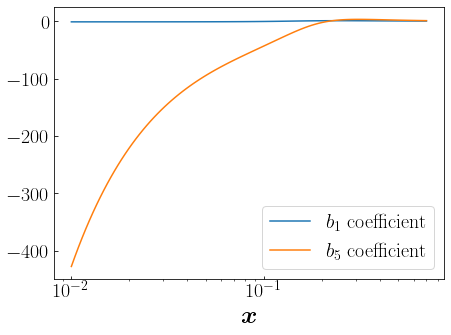

In [187]:
nrows,ncols=1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

b1c = b1_coeff(y)
b5c = b5_coeff(x,y)
ax.plot(x,b1c,label=r'$b_1~{\rm coefficient}$')
ax.plot(x,b5c,label=r'$b_5~{\rm coefficient}$')

ax.set_xlabel(r'\boldmath $x$',size=25)
# ax.set_ylabel(r'\boldmath $A_{PV}^{N}$',size=25)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)
ax.legend(fontsize=20,loc='lower right')
ax.semilogx()

plt.show()

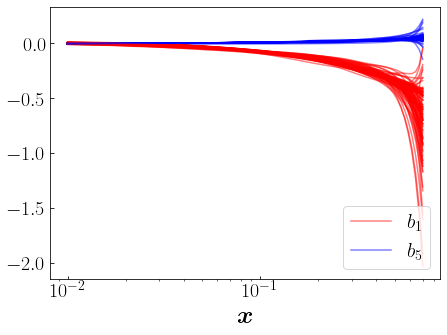

In [188]:
nrows,ncols=1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

b1_ = b1(x,Q2)
b5_ = b5(x,Q2)
for i in range(np.shape(b1_)[0]):
    ax.plot(x,b1_[i],color='r',alpha=0.5,label=r'$b_1$' if i == 0 else '')
    ax.plot(x,b5_[i],color='b',alpha=0.5,label=r'$b_5$' if i == 0 else '')

ax.set_xlabel(r'\boldmath $x$',size=25)
# ax.set_ylabel(r'\boldmath $A_{PV}^{N}$',size=25)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)
ax.legend(fontsize=20,loc='lower right')
ax.semilogx()

plt.show()

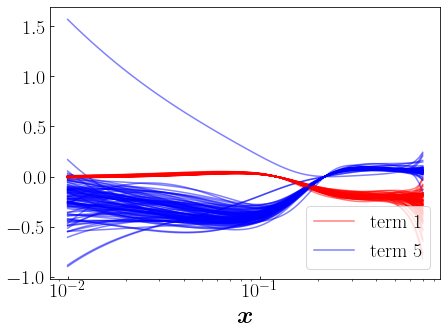

In [189]:
nrows,ncols=1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

b1c = b1_coeff(y)
b1_ = b1(x,Q2)
b5c = b5_coeff(x,y)
b5_ = b5(x,Q2)
for i in range(np.shape(b1_)[0]):
    ax.plot(x,b1c*b1_[i],color='r',alpha=0.5,label=r'$\rm term~1$' if i == 0 else '')
    ax.plot(x,b5c*b5_[i],color='b',alpha=0.5,label=r'$\rm term~5$' if i == 0 else '')

ax.set_xlabel(r'\boldmath $x$',size=25)
# ax.set_ylabel(r'\boldmath $A_{PV}^{N}$',size=25)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)
ax.legend(fontsize=20,loc='lower right')
ax.semilogx()

plt.show()

# Remake Nobuo's plots  
[link to slides](https://www.jlab.org/sites/default/files/theory/files/nobuosato22_midx.pdf)

In [ ]:
GF  = 1.1663787e-5
sin2_thw = 0.23122
gAe = -0.5
gVe = -0.5 + 2.0*sin2_thw

alfa = 1.0/137.0
M = 0.938

# JLab
E = 24.0
root_s = np.sqrt(M**2.0 + 2.0*M*E)

# EIC
# root_s = 140.0

s = root_s**2.0

In [ ]:
q_flavs = ['d','u','s','c']
iflavs  = {q_flavs[i]: i+1 for i in range(len(q_flavs))}

eU  = 2.0/3.0
eD  = -1.0/3.0
eq = {'d':eD, 'u':eU, 's':eD, 'c':eU}

gA = {_: np.sign(eq[_])/2.0 for _ in q_flavs}
gV = {_: gA[_]-2.0*eq[_]*sin2_thw for _ in q_flavs}

In [ ]:
def get_F1(x,Q2,omit=[]):
    flavs = np.array([iflavs[flav] for flav in q_flavs if flav not in omit])
    eq_   = np.array([eq[flav] for flav in q_flavs if flav not in omit])
    gAq   = np.array([gA[flav] for flav in q_flavs if flav not in omit])
    gVq   = np.array([gV[flav] for flav in q_flavs if flav not in omit])
    
    F1 = {'g': [], 'gZ': [], 'Z': []}
    
    ireps = 100
    for irep in range(ireps):
        temp_g  = []
        temp_gZ = []
        temp_Z  = []
        for x_ in x:
            f = np.array([(JAM[irep].xfxQ2(flav,x_,Q2) + JAM[irep].xfxQ2(-flav,x_,Q2))/x_ for flav in flavs])
            temp_g.append( np.sum(0.5*eq_**2.0*f))
            temp_gZ.append(np.sum(eq_*gVq*f))
            temp_Z.append( np.sum(0.5*(gVq**2.0+gAq**2.0)*f))
        F1['g'].append(temp_g)
        F1['gZ'].append(temp_gZ)
        F1['Z'].append(temp_Z)
    
    for _ in F1.keys():
        F1[_] = np.array(F1[_])
        
    return F1
    
def get_F3(x,Q2,omit=[]):
    flavs = np.array([iflavs[flav] for flav in q_flavs if flav not in omit])
    eq_   = np.array([eq[flav] for flav in q_flavs if flav not in omit])
    gAq   = np.array([gA[flav] for flav in q_flavs if flav not in omit])
    gVq   = np.array([gV[flav] for flav in q_flavs if flav not in omit])
    
    F3 = {'gZ': [], 'Z': []}
    
    ireps = 100
    for irep in range(ireps):
        temp_gZ = []
        temp_Z  = []
        for x_ in x:
            f = np.array([(JAM[irep].xfxQ2(flav,x_,Q2) - JAM[irep].xfxQ2(-flav,x_,Q2))/x_ for flav in flavs])
            temp_gZ.append(np.sum(2.0*eq_*gAq*f))
            temp_Z.append( np.sum(2.0*gVq*gAq*f))
        F3['gZ'].append(temp_gZ)
        F3['Z'].append(temp_Z)
    
    for _ in F3.keys():
        F3[_] = np.array(F3[_])
        
    return F3

In [ ]:
def get_a1(x,Q2,omit=[]):
    F1 = get_F1(x,Q2,omit)
    return 2.0*gAe*F1['gZ']/F1['g']
    
def get_a3(x,Q2,omit=[]):
    F1 = get_F1(x,Q2,omit)
    F3 = get_F3(x,Q2,omit)
    return gVe*F3['gZ']/F1['g']

def get_Y1(rs,x,Q2):
    s = rs**2.0
    y = Q2/x/(s-M**2.0)
    return 1.0

def get_Y3(rs,x,Q2):
    s = rs**2.0
    y = Q2/x/(s-M**2.0)
    return (1.0-(1.0-y)**2.0)/(1.0+(1.0-y)**2.0)

def get_APV(rs,x,Q2,omit=[]):
    a1 = get_a1(x,Q2,omit)
    a3 = get_a3(x,Q2,omit)
    Y1 = get_Y1(rs,x,Q2)
    Y3 = get_Y3(rs,x,Q2)
    return -GF*Q2/4/np.sqrt(2)/np.pi/alfa*(a1*Y1 + a3*Y3)

#### Ratio

In [ ]:
x  = np.logspace(-1.0,np.log10(0.7))
Q2 = 4.0

$a_{1,3}$

In [ ]:
a1 = get_a1(x,Q2)
a3 = get_a3(x,Q2)

a1_nosc = get_a1(x,Q2,omit=['s','c'])
a3_nosc = get_a3(x,Q2,omit=['s','c'])

In [ ]:
nrows,ncols = 1,2
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

for i in range(np.shape(a3)[0]):
    ax[0].plot(x,a1[i],'r-',alpha=0.3)
    ax[1].plot(x,a3[i],'r-',alpha=0.3)

    ax[0].plot(x,a1_nosc[i],'y-',alpha=0.3)
    ax[1].plot(x,a3_nosc[i],'y-',alpha=0.3)
#     ax.plot(x,a3[i]/a1[i],'r-',alpha=0.3)

ax[1].plot([],[],'r-',lw=5,label=r'$\rm proton$')
ax[1].plot([],[],'y-',lw=5,label=r'$s,\bar{s},c,\bar{s}=0$')
ax[1].legend(fontsize=20)

# ax[0].set_ylim(-0.95,-0.55)
# ax[1].set_ylim(-0.11,-0.05)

ax[0].set_ylabel(r'$a_1$',size=30)
ax[1].set_ylabel(r'$a_3$',size=30)
ax[0].text(s=r'\boldmath $E_{\ell} = %.0f~{\rm GeV} \\[1ex] Q^2 = %.1f~{\rm GeV^2}$'%(E,Q2),x=0.95,
           y=0.1,ha='right',va='bottom',transform=ax[0].transAxes,size=25)
for i in range(2):
    ax[i].set_xlabel(r'$x$',size=30)
    ax[i].tick_params(which='major',axis='both',direction='in',labelsize=20)
plt.tight_layout()
plt.show()

$a_3/a_1$

In [ ]:
nrows,ncols = 1,1
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

for i in range(np.shape(a3)[0]):
    ax.plot(x,a3[i]/a1[i]          ,'r-',alpha=0.3)
#     ax.plot(x,a3_nosc[i]/a1_nosc[i],'y-',alpha=0.3)

# ax.plot([],[],'r-',lw=5,label=r'$\rm proton$')
# ax.plot([],[],'y-',lw=5,label=r'$s,\bar{s},c,\bar{s}=0$')
# ax.legend(fontsize=20)

# ax.set_ylim(0.00,0.20)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$a_3/a_1$',size=30)
ax.text(s=r'\boldmath $E_{\ell} = %.0f~{\rm GeV} \\[1ex] Q^2 = %.1f~{\rm GeV^2}$'%(E,Q2),x=0.95,
           y=0.1,ha='right',va='bottom',transform=ax.transAxes,size=25)
ax.tick_params(which='major',axis='both',direction='in',labelsize=20)
    
plt.tight_layout()
plt.show()

$(a_3Y_3)/(a_1Y_1)$

In [ ]:
Q2s = [1.6,2.0,4.0]

In [ ]:
Y1 = [get_Y1(root_s,x,Q2_) for Q2_ in Q2s]
Y3 = [get_Y3(root_s,x,Q2_) for Q2_ in Q2s]

In [ ]:
nrows,ncols = 1,1
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

colors = ['b','orange','g']
for i in range(3):
    ax.plot(x,Y3[i]/Y1[i],color=colors[i],label=r'$Q^2 = %.1f~{\rm GeV}^2$'%Q2s[i])

ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$Y_3/Y_1$',size=20)
ax.legend(fontsize=20,loc=1)
ax.text(s=r'\boldmath $E_{\ell} = %.0f~{\rm GeV}$'%E,x=0.95,y=0.55,ha='right',va='top',transform=ax.transAxes,size=25)
ax.tick_params(which='major',axis='both',direction='in',labelsize=20)
plt.show()

$A_{\rm PV}$

In [ ]:
APV      = get_APV(root_s,x,Q2)
APV_nosc = get_APV(root_s,x,Q2,omit=['s','c'])

In [ ]:
nrows,ncols = 1,1
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

for i in range(np.shape(a3)[0]):
    ax.plot(x,APV[i]/Q2*1e6     ,'r-',alpha=0.3)
    ax.plot(x,APV_nosc[i]/Q2*1e6,'y-',alpha=0.3)

# ax.set_xlim()
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$A_{\rm PV}/Q^2~[10^{-6}/{\rm GeV}^2]$',size=20)
ax.text(s=r'\boldmath $E_{\ell} = %.0f~{\rm GeV} \\[1ex] Q^2 = %.1f~{\rm GeV^2}$'%(E,Q2),
        x=0.95,y=0.9,ha='right',va='top',transform=ax.transAxes,size=25)
ax.tick_params(which='major',axis='both',direction='in',labelsize=20)
plt.show()